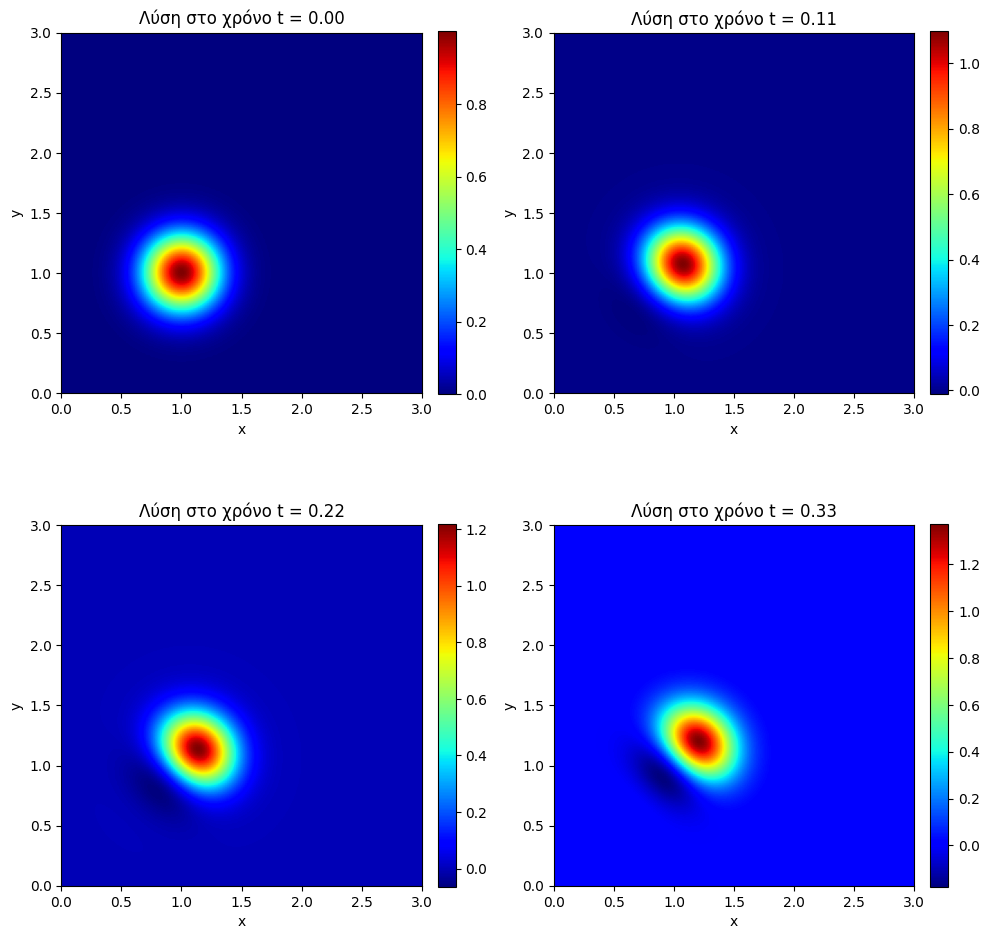

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός των παραμέτρων
nx = 200 # Αριθμός σημείων στον άξονα x
ny = 200 # Αριθμός σημείων στον άξονα y
xmin = 0 # Ελάχιστη τιμή του x
xmax = 3 # Μέγιστη τιμή του x
ymin = 0 # Ελάχιστη τιμή του y
ymax = 3 # Μέγιστη τιμή του y
nt = 10 # Αριθμός χρονικών βημάτων
tstart = 0 # Αρχική χρονική στιγμή
tend = 1 # Τελική χρονική στιγμή
dt = (tend - tstart) / (nt - 1) # Μέγεθος χρονικού βήματος

D = 0.05 # Συντελεστής διάχυσης

# Ταχύτητα στον άξονα x
u_vel = 0.75

# Ταχύτητα στον άξονα y
v_vel = 0.75

# Δημιουργία του πλέγματος
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)
X, Y = np.meshgrid(x, y)

# Αρχική συνθήκη
u0 = np.exp(-10 * ((X - 1) ** 2 + (Y - 1) ** 2))

# Αρχικοποίηση του πίνακα λύσης
u = np.zeros((nt, ny, nx))
u[0] = u0.copy()

# Επίλυση της εξίσωσης μεταφοράς στον χρόνο χρησιμοποιώντας τη μέθοδο FTCS
for n in range(nt - 1):
    u[n+1, 1:-1, 1:-1] = u[n, 1:-1, 1:-1] + dt * (
        -u_vel * (u[n, 1:-1, 2:] - u[n, 1:-1, :-2]) / (2 * dx) +
        -v_vel * (u[n, 2:, 1:-1] - u[n, :-2, 1:-1]) / (2 * dy) +
        D * dt * (
            (u[n, 1:-1, 2:] - 2 * u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2]) / dx**2 +
            (u[n, 2:, 1:-1] - 2 * u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1]) / dy**2
        )
    )

# Προβολή της λύσης σε 4 διαφορετικές χρονικές στιγμές
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, n in enumerate([0, 1, 2, 3]):
    im = axs[i].imshow(u[n], extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='jet')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title('Λύση στο χρόνο t = {:.2f}'.format(n * dt))
    cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()